# **Neural Networks**
part 2: backpropagation

### **Changes**
- added weights' and biases' initiation methods: he normal and xavier normal
- backpropagation and training (gradient descent)
- training batches
- added training history attribute to MLP class - for analysis purposes
- visualisation: weights in subsequent epochs

### **Imports**

In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from network.mlp import MLP
from metrics.metrics import mse
from visualization.visualization import plot_weights

In [2]:
square_simple_train = pd.read_csv("./data/regression/square-simple-training.csv")
square_simple_test = pd.read_csv("./data/regression/square-simple-test.csv")

In [3]:
steps_small_train = pd.read_csv("./data/regression/steps-small-training.csv")
steps_small_test = pd.read_csv("./data/regression/steps-small-test.csv")

In [4]:
multimodal_large_train = pd.read_csv("./data/regression/multimodal-large-training.csv")
multimodal_large_test = pd.read_csv("./data/regression/multimodal-large-test.csv")

### **Dataset: Square Simple**

Text(0.5, 1.0, 'Square Simple Training Data')

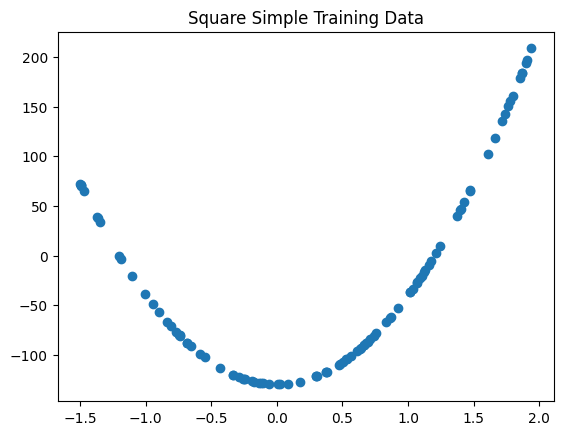

In [5]:
plt.scatter(square_simple_train[["x"]], square_simple_train[["y"]])
plt.title("Square Simple Training Data")

In [6]:
np.random.seed(seed=42)

Epoch: 0; loss: 9354.4406
Epoch: 1000; loss: 56.1566
Epoch: 2000; loss: 21.6307
Epoch: 3000; loss: 11.8857
Epoch: 4000; loss: 7.6425
Epoch: 5000; loss: 5.0987
Final epoch: 5999; loss: 3.5697


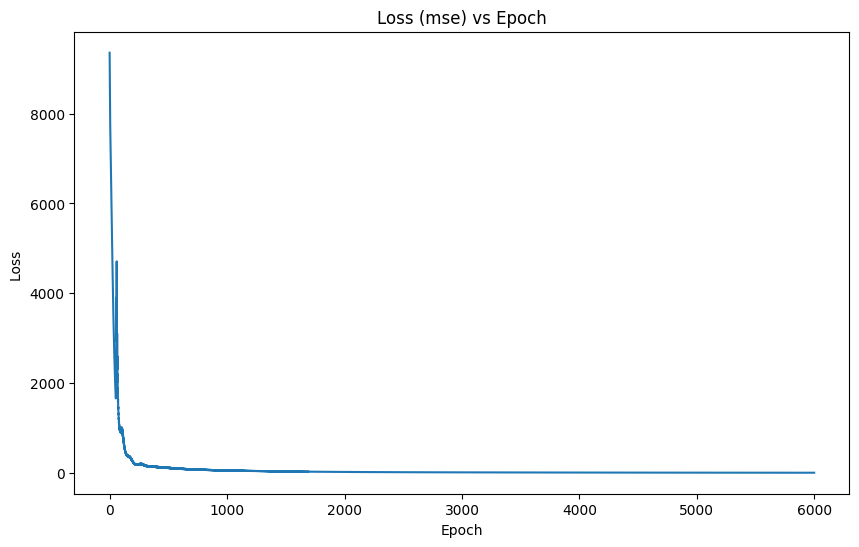

Epoch: 0; loss: 8247.0098
Epoch: 1000; loss: 5.3617
Epoch: 2000; loss: 1.4366
Epoch: 3000; loss: 0.6605
Epoch: 4000; loss: 0.4652
Epoch: 5000; loss: 0.3738
Final epoch: 5999; loss: 0.3060


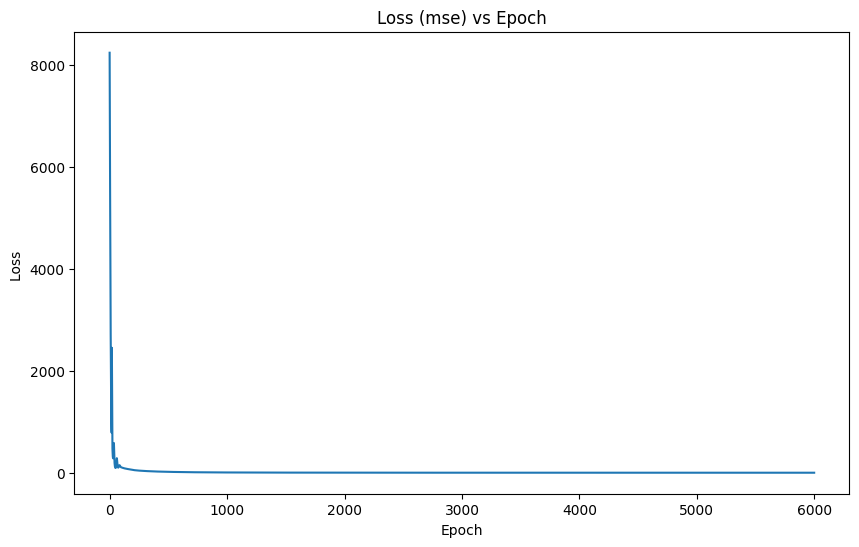


Training time whole dataset: 0.686

Training time with batch: 1.865


In [6]:
layers_1 = [
    {"output_size" : 50, "activation" : "sigmoid", "init" : "xavier_normal"},
    {"output_size" : 1, "activation" : "identity", "init" : "xavier_normal"}
]

mlp_1 = MLP(layers_init=layers_1, input=square_simple_train[["x"]])

x = square_simple_train[["x"]].to_numpy()
y = square_simple_train[["y"]].to_numpy()

t1_0 = time.time()
mlp_1.train(x, y, learning_rate=0.04, epochs=6000)
t1_1 = time.time()

mlp_1 = MLP(layers_init=layers_1, input=square_simple_train[["x"]])

t1_2 = time.time()
mlp_1.train(x, y, learning_rate=0.04, epochs=6000, batch_size=32)
t1_3 = time.time()

print(f"\nTraining time whole dataset: {(t1_1 - t1_0):.3f}")
print(f"\nTraining time with batch: {(t1_3 - t1_2):.3f}")

In [7]:
y_pred_1 = mlp_1.forward(square_simple_test[["x"]].to_numpy())
y_true_1 = square_simple_test[["y"]].to_numpy()

mse(y_true_1, y_pred_1)

np.float64(0.6323698204695216)

MSE (training set) = 3.57 / 0.31  
MSE (test set) = 0.63

Batch training resulted in better metrics, but slightly worse time.

Prediction visualization.

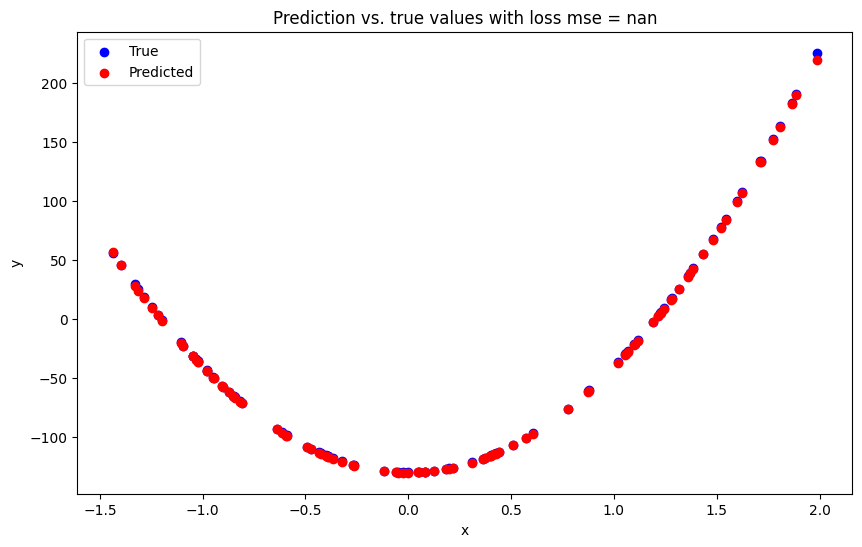

Loss mse = nan.


In [8]:
mlp_1.visualize_prediction(square_simple_test[["x"]], square_simple_test[["y"]])

In [9]:
# plot_weights(mlp_1, filename="./plots/square_simple_weights.gif", fps = 20, plot_every_k_epochs=50)

### **Dataset: Steps Small**

Text(0.5, 1.0, 'Steps Small Training Data')

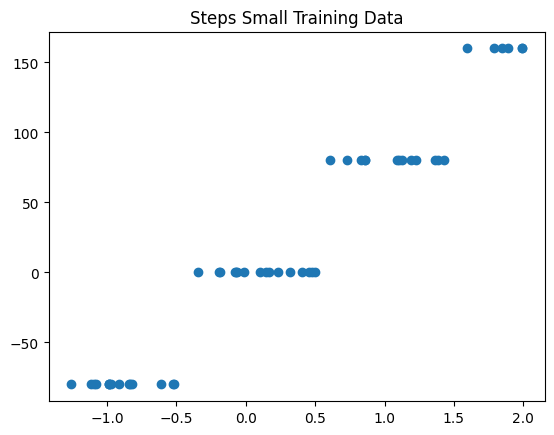

In [9]:
plt.scatter(steps_small_train[["x"]], steps_small_train[["y"]])
plt.title("Steps Small Training Data")

Epoch: 0; loss: 6589.4331
Epoch: 100; loss: 134.4727
Epoch: 200; loss: 13.7687
Epoch: 300; loss: 2.3577
Epoch: 400; loss: 0.8288
Epoch: 500; loss: 0.5574
Epoch: 600; loss: 0.4944
Epoch: 700; loss: 0.4701
Epoch: 800; loss: 0.4540
Epoch: 900; loss: 0.4403
Final epoch: 1000; loss: 0.4276


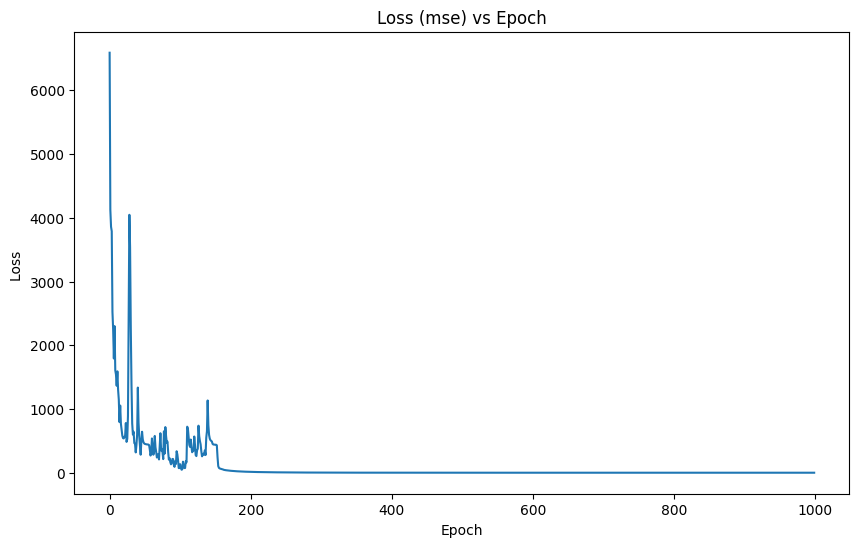

Epoch: 0; loss: 9515.4252
Epoch: 100; loss: 440.5175
Epoch: 200; loss: 440.3803
Epoch: 300; loss: 37.4951
Epoch: 400; loss: 0.3909
Epoch: 500; loss: 0.3563
Epoch: 600; loss: 0.3349
Epoch: 700; loss: 0.3164
Epoch: 800; loss: 0.3001
Epoch: 900; loss: 0.2858
Final epoch: 1000; loss: 0.2731


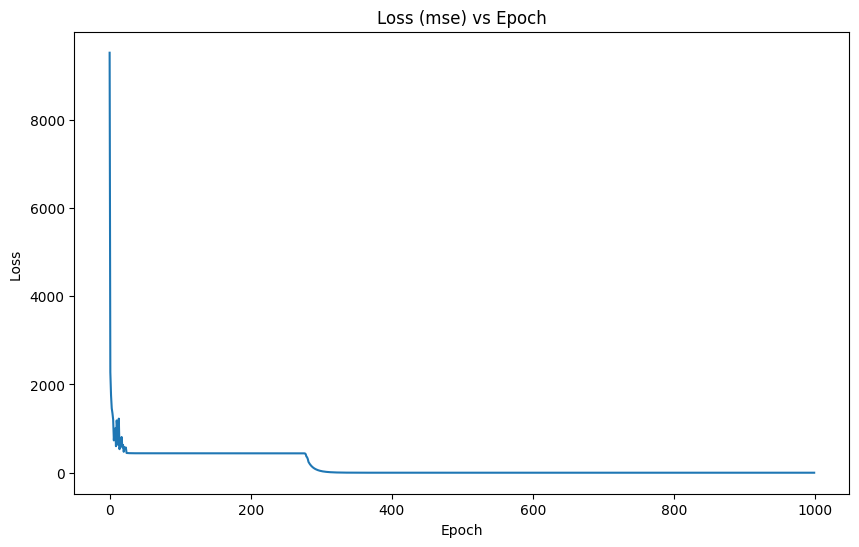


Training time whole dataset: 0.098

Training time with batch: 0.093


In [ ]:
layers_2 = [
    {"output_size" : 10, "activation" : "sigmoid", "init" : "xavier_normal"},
    {"output_size" : 1, "activation" : "identity", "init" : "xavier_normal"}
]

mlp_2 = MLP(layers_init=layers_2, input=steps_small_train[["x"]])

x = steps_small_train[["x"]].to_numpy()
y = steps_small_train[["y"]].to_numpy()

t1_0 = time.time()
mlp_2.train(x, y, learning_rate=0.5, epochs=1000)
t1_1 = time.time()

mlp_2 = MLP(layers_init=layers_2, input=steps_small_train[["x"]])

t1_2 = time.time()
mlp_2.train(x, y, learning_rate=0.5, epochs=1000, batch_size=32)
t1_3 = time.time()

print(f"\nTraining time whole dataset: {(t1_1 - t1_0):.3f}")
print(f"\nTraining time with batch: {(t1_3 - t1_2):.3f}")


In [12]:
y_pred_2 = mlp_2.forward(steps_small_test[["x"]].to_numpy())
y_true_2 = steps_small_test[["y"]].to_numpy()

mse(y_true_2, y_pred_2)

np.float64(78.07326988835528)

MSE (training set) = 0.43 / 0.27

MSE (test set) = 78

Batch training resulted in both improved MSE and runtime. 

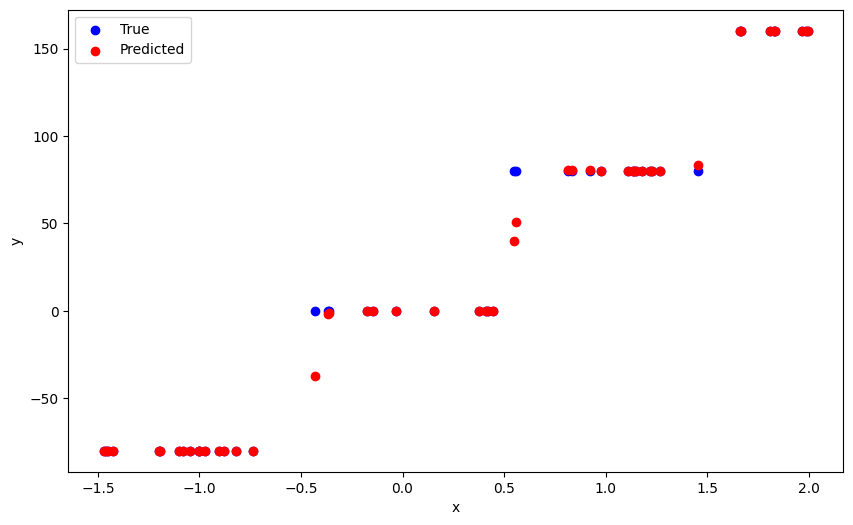

In [13]:
mlp_2.visualize_prediction(steps_small_test[["x"]], steps_small_test[["y"]])

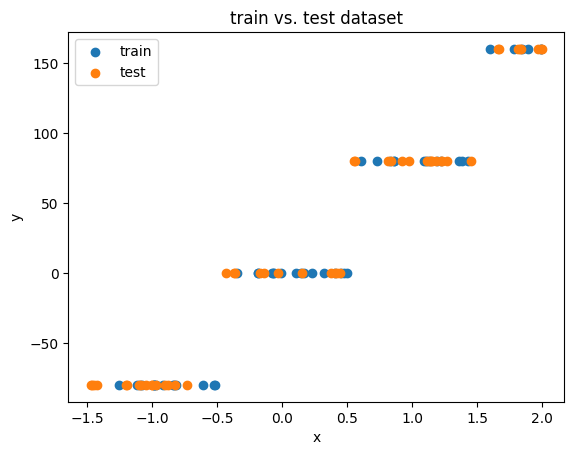

In [17]:
plt.scatter(steps_small_train[["x"]], steps_small_train[["y"]], label="train")
plt.scatter(steps_small_test[["x"]], steps_small_test[["y"]], label="test")
plt.xlabel("x")
plt.ylabel("y")
plt.title("train vs. test dataset")
plt.legend()

High MSE on test dataset could be caused  by the fact that test steps are shifted slightly to the left with regard to the training set - the neural network did not learn such points.

In [12]:
# plot_weights(mlp_2, filename="./plots/steps_small_weights.gif", plot_every_k_epochs=25)

### **Dataset: Multimodal Large**

Text(0.5, 1.0, 'Multimodal Large Training Data')

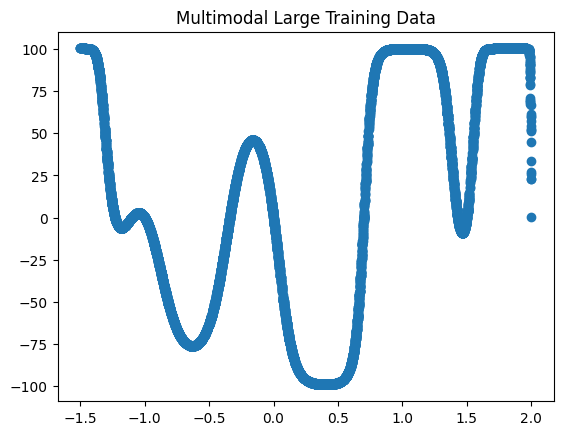

In [10]:
plt.scatter(multimodal_large_train[["x"]], multimodal_large_train[["y"]])
plt.title("Multimodal Large Training Data")

Epoch: 0; loss: 5277.5405
Epoch: 1000; loss: 1486.7274
Epoch: 2000; loss: 682.1138
Epoch: 3000; loss: 354.8884
Epoch: 4000; loss: 242.9683
Epoch: 5000; loss: 181.8644
Epoch: 6000; loss: 143.4558
Epoch: 7000; loss: 116.1912
Epoch: 8000; loss: 95.0205
Epoch: 9000; loss: 78.5287
Epoch: 10000; loss: 65.7720
Epoch: 11000; loss: 55.1142
Epoch: 12000; loss: 46.9564
Epoch: 13000; loss: 40.7090
Epoch: 14000; loss: 35.8097
Epoch: 15000; loss: 31.7667
Epoch: 16000; loss: 28.1921
Epoch: 17000; loss: 25.4107
Epoch: 18000; loss: 23.2586
Epoch: 19000; loss: 21.4306
Final epoch: 19999; loss: 19.2925


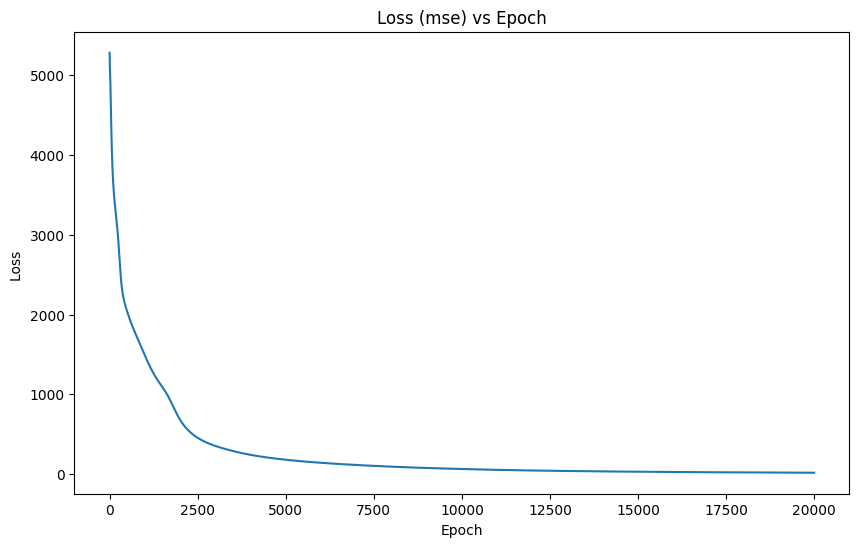


Training time whole dataset: 420.048


In [14]:
layers_3 = [
    {"output_size" : 100, "activation" : "sigmoid", "init" : "xavier_normal"},
    {"output_size" : 1, "activation" : "identity", "init" : "xavier_normal"}
]

mlp_3 = MLP(layers_init=layers_3, input=multimodal_large_train[["x"]])

x = multimodal_large_train[["x"]].to_numpy()
y = multimodal_large_train[["y"]].to_numpy()

t1_0 = time.time()
mlp_3.train(x, y, learning_rate=0.01, epochs=20000)
t1_1 = time.time()

# mlp_3 = MLP(layers_init=layers_3, input=multimodal_large_train[["x"]])

# t1_2 = time.time()
# mlp_3.train(x, y, learning_rate=0.01, epochs=1000, batch_size=32)
# t1_3 = time.time()

print(f"\nTraining time whole dataset: {(t1_1 - t1_0):.3f}")
# print(f"\nTraining time with batch: {(t1_3 - t1_2):.3f}")

In [21]:
y_pred = mlp_3.forward(multimodal_large_test[["x"]].to_numpy())
y_true = multimodal_large_test[["y"]].to_numpy()
mse(y_true, y_pred)

np.float64(13.970262304187742)

MSE (training set) = 19.29
MSE (test set) = 13.97

No training with batches due to long runtime.

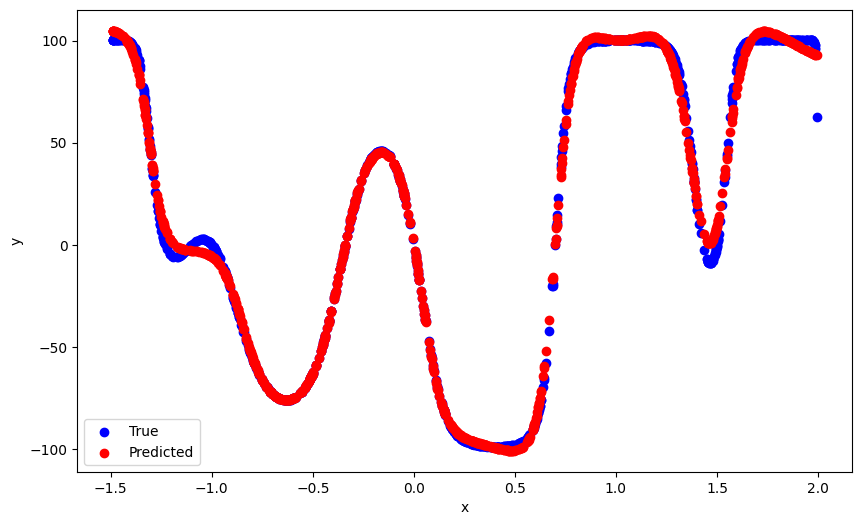

In [22]:
mlp_3.visualize_prediction(multimodal_large_test[["x"]], multimodal_large_test[["y"]])

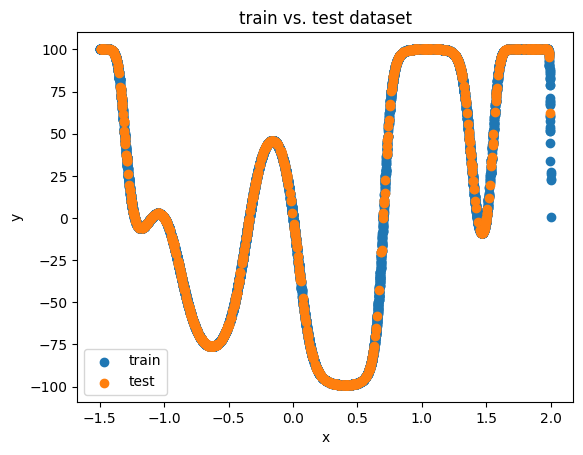

In [23]:
plt.scatter(multimodal_large_train[["x"]], multimodal_large_train[["y"]], label="train")
plt.scatter(multimodal_large_test[["x"]], multimodal_large_test[["y"]], label="test")
plt.xlabel("x")
plt.ylabel("y")
plt.title("train vs. test dataset")
plt.legend()

In [ ]:
# plot_weights(mlp_3, filename="./plots/multimodal_large_weights.gif", plot_every_k_epochs=100)